In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

#Grabbing the data
tab = astropy.io.ascii.read("PS_2022.01.23_20.59.01.csv")
# PS_2020.12.15_09.21.06.csv for given example in carmen

### For overplotting solar sytem bodies
import pandas as pd
solsys = pd.read_csv("solsys (1).csv")
solsys = solsys[ solsys["pl_controv_flag"] == 1 ]
print( solsys.head() )

  pl_solsys  pl_controv_flag  period_days      mass_e    mass_j  semi_ma  \
0   mercury                1         88.0    0.055274  0.000174      0.4   
1     venus                1        225.0    0.814998  0.002564      0.7   
2     earth                1        365.0    1.000000  0.003146      1.0   
3      mars                1        657.0    0.107447  0.000338      1.5   
4   jupiter                1       4328.9  317.828133  1.000000      5.2   

    rad_km       mass_kg       rad_e     rad_j  
0   2439.7  3.301040e+23    0.055274  0.000174  
1   6051.8  4.867320e+24    0.814998  0.002564  
2   6371.0  5.972190e+24    1.000000  0.003146  
3   3389.5  6.416930e+23    0.107447  0.000338  
4  69911.0  1.898130e+27  317.828133  1.000000  


In [2]:
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

## Mass-Period

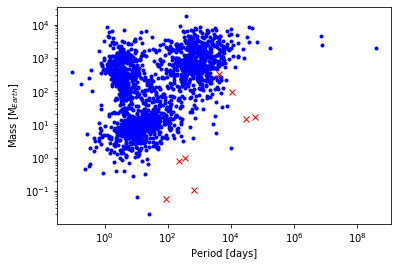

In [4]:
### Mass-Period Plot
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.plot(solsys["period_days"], solsys["mass_e"], "rx")

## Mass-Semi-major axis

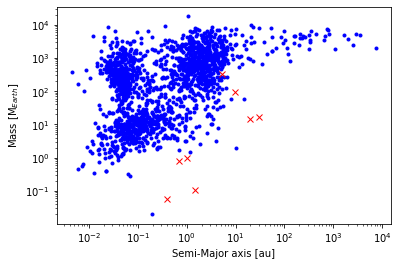

In [5]:
### Mass - Semi-Major axis
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major axis [au]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.plot(solsys["semi_ma"], solsys["mass_e"], "rx")

## Radius-Semi-major axis

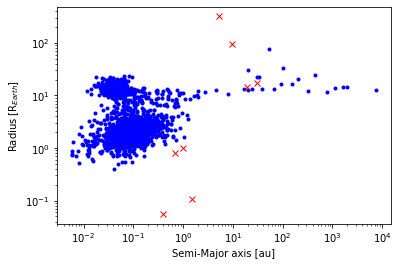

In [6]:
### Radius (earth) - Semi-Major axis
plt.plot(tab["pl_orbsmax"], tab["pl_rade"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major axis [au]")
plt.ylabel(r"Radius [R$_{Earth}$]")
plt.plot(solsys["semi_ma"], solsys["rad_e"], "rx")

## Radius-Period 

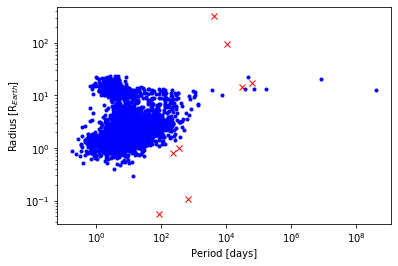

In [7]:
### Radius (earth) - Period
plt.plot(tab["pl_orbper"], tab["pl_rade"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Earth}$]")
plt.plot(solsys["period_days"], solsys["rad_e"], "rx")

## Radial velocity equations for the state-of-the-art



## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

#### Sin(i) = 1 for edge-on orbit:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

##### This K value for the state-of-the-art can be found in the Espresso paper in the abstract where it says "We demonstrate a radial-velocity precision ofbetterthan 25 cm s−1during one night and 50 cm s−1over several months" which is where the 0.5 m/s comes from.

##### As for the 0.5 solar mass, why that mass and not 1 solar mass? Is the 0.5 solar mass also a state-of-the-art performance value

In [8]:
import astropy.constants as ac
import astropy.units as u

In [29]:
sol_mass = 0.5
K_val = 0.5

# x-axis (semi-major axis) for a continuous line
sma_arr = 10.0**(np.arange(5)-2) * u.AU

# x axis for period plots
per_arr = 10.0**(np.arange(8)-1) * u.day

# y axis mass fo the planet determined by equations above
m_p_arr_sma = K_val * u.meter / u.second * sol_mass * u.solMass * np.sqrt(sma_arr / ac.G / (sol_mass * u.solMass))

# y axis for with period for the x axis
m_p_arr_per = K_val * u.meter / u.second * sol_mass * u.solMass * np.sqrt(((per_arr**2)*ac.G*(sol_mass * u.solMass)/2/np.pi)**(1/3) / ac.G / (sol_mass * u.solMass))



## Mass vs SM axis with sensitivity line

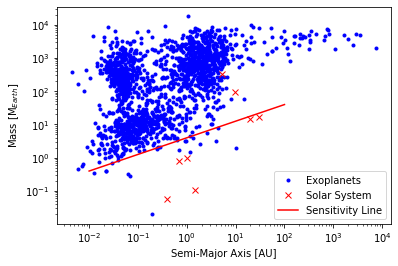

In [30]:
# Mass sensitivity plot for radial velocity state-of-the-art on a Mass vs Semi-Major axis

plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "b.", label="Exoplanets")
plt.plot(solsys["semi_ma"], solsys["mass_e"], "rx", label="Solar System")
plt.plot(sma_arr.value, m_p_arr_sma.decompose().to(u.earthMass), color="red", label="Sensitivity Line")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.legend(loc="lower right")

## Mass vs Period sensitivity line

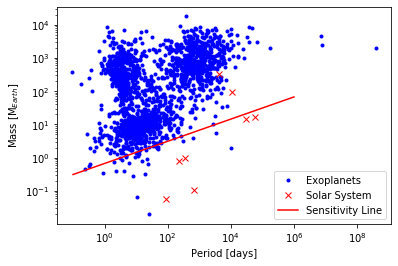

In [31]:
### Mass-Period Plot
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "b.", label="Exoplanets")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.plot(solsys["period_days"], solsys["mass_e"], "rx", label="Solar System")
#Sensitivty line
plt.plot(per_arr.value, m_p_arr_per.decompose().to(u.earthMass), color="red", label="Sensitivity Line")
#Legend
plt.legend(loc="lower right")

## Radius vs SM axis

### For our particular case of a Jupiter-like planet around a Sun-like star, I used the equation for radial velocity K and used the mass of jupiter for Mp and the mass of the sun for M* and used the semi-major axis of Jupiter at 5.2 au for "a".

## This gave a k value of 12.46 m/s which means that if there was a similar size jupiter around a sun-like star in the same orbit as our jupiter, then we would easily be able to detect it due to 12.46 m/s being much higher than our 0.5 m/s state-of-the-art. Thus, using radial velocity is a very good method for detecting Jupiter-like planets around sun-like stars. 

### This is with the assumption of an edge-on orbit (i = 90 degrees and so sin(i) = 1)